In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [25]:
# load the dataset from CSV
housingDF = pd.read_csv("HousingSQL.csv")

In [26]:
housingDF.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [27]:
# Assuming the target variable is in a column named "target"
X = housingDF.drop(columns=["price"])  # Features
y = housingDF["price"]  # Target variable

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)


In [30]:
# Initialize and train the AdaBoostRegressor

base_estimator = DecisionTreeRegressor(max_depth=4)
ada_boost_reg = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=1)
ada_boost_reg.fit(X_train, y_train)


AdaBoostRegressor(random_state=1)

In [32]:
# Make predictions
y_pred = ada_boost_reg.predict(X_test)


In [33]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Ada Boost Regressor; R² Score:", r2)

Ada Boost Regressor; R² Score: 0.9343404715643459


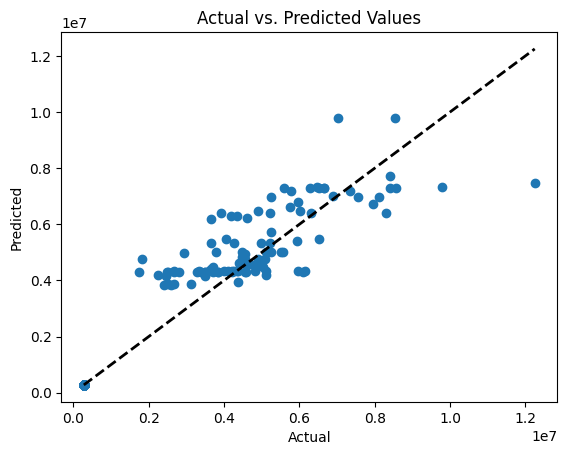

In [34]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()